In [1]:
# Importer les librairie necessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#  1- Explorer et analyser les données

In [2]:
# Chargement des données
# url: https://drive.google.com/file/d/1FFjeF6-wUFJjws-17VQWNYOsSFiTK-_X/view?usp=share_link
stars_datas = pd.read_csv('datas/Stars.csv')
pd.set_option('display.max_columns', None)
stars_datas.head(20)

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.120,Red,M,0
1,3042,0.000500,0.1542,16.600,Red,M,0
2,2600,0.000300,0.1020,18.700,Red,M,0
3,2800,0.000200,0.1600,16.650,Red,M,0
4,1939,0.000138,0.1030,20.060,Red,M,0
5,2840,0.000650,0.1100,16.980,Red,M,0
6,2637,0.000730,0.1270,17.220,Red,M,0
7,2600,0.000400,0.0960,17.400,Red,M,0
8,2650,0.000690,0.1100,17.450,Red,M,0
9,2700,0.000180,0.1300,16.050,Red,M,0


###### Afficher le nombre de ligne et de colonne

In [3]:
# Nombre de ligne et de colonne
stars_datas.shape

(240, 7)

In [4]:
# Afficher le nom des colonnes
stars_datas.columns

Index(['Temperature', 'L', 'R', 'A_M', 'Color', 'Spectral_Class', 'Type'], dtype='object')

###### Vérifier et supprimer les données sont duppliqués

In [5]:
# Vérifier et supprimer les données sont duppliqués
sum_dup = stars_datas.duplicated().sum()
print('Nb duppli avant: ' + str(sum_dup))
if(sum_dup > 0):
    stars_datas = stars_datas.drop_duplicates()
    print('Nb duppli après: ' + str(stars_datas.duplicated().sum()))

Nb duppli avant: 0


###### Vérifier les valeurs nulles

In [6]:
# Vérifier les valeurs nulles
stars_datas.isnull().sum()

Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
Type              0
dtype: int64

### Observations: 
Il n'y a pas de données nulles dans le dataset. C'est une bonne chose!

###### Quelques informations sur les variables numériques

In [7]:
# Quelques informations sur les variables numériques
stars_datas.describe()

,Temperature,L,R,A_M,Type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


### Observations :
La colonne Type n'est pas pertinente avec le describe. Mais pour la temperature, luminosité (L), Rayon (R) et la grandeur (A_M) on obtient des informations interessante comme la moyenne, le min et le max.

###### Distribution de la colonne Type

/home/yannis/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution des Types')

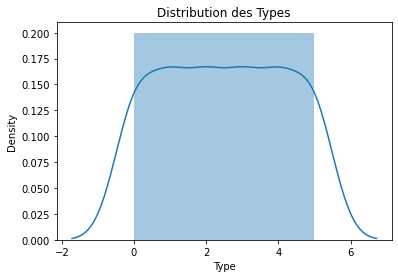

In [8]:
# Distribution de la colonne Type
sns.distplot(a=stars_datas.Type, hist=True, kde=True )
plt.title('Distribution des Types')

### Observations :

La répartition des types est homogène.

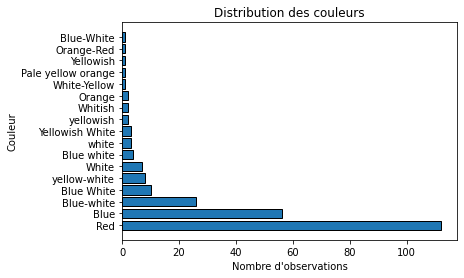

In [9]:
# Consulter la distribution par couleur
color_counts = stars_datas['Color'].value_counts()
colors = color_counts.index
counts = color_counts.values

plt.barh(colors, counts, edgecolor='black')
plt.xlabel('Nombre d\'observations')
plt.ylabel('Couleur')
plt.title('Distribution des couleurs')

plt.show()

### Observations : 

La couleurs rouge domine largement les couleurs des spectres dans le dataset.Il est ensuite suivi par la couleur bleu. Donc la répartition n'est pas équilibré mais provient de sources fiables de la NASA.

###### Consulter la distribution par spectral class

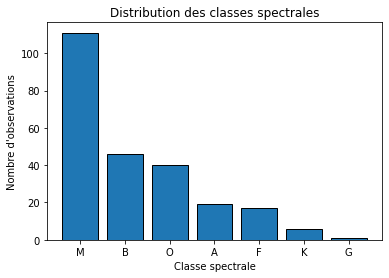

In [10]:
# Consulter la distribution par spectral class
spectral_class_counts = stars_datas['Spectral_Class'].value_counts()
spectral_classes = spectral_class_counts.index
counts = spectral_class_counts.values

plt.bar(spectral_classes, counts, edgecolor='black')
plt.xlabel('Classe spectrale')
plt.ylabel('Nombre d\'observations')
plt.title('Distribution des classes spectrales')

plt.show()

### Observation : 
La classe de spectre M comptabilise le plus d'observations. La répartition n'est pas très équilibrés.

###### Convertion des variables catégorielles "Color" et "Spectral_Class" en données numériques

In [11]:
from sklearn.preprocessing import LabelEncoder
# Convertion des variables catégorielles en données numériques
label = LabelEncoder()
label.fit(stars_datas["Spectral_Class"].drop_duplicates())
stars_datas["Spectral_Class"] = label.transform(stars_datas["Spectral_Class"])
label.fit(stars_datas["Color"].drop_duplicates())
stars_datas["Color"] = label.transform(stars_datas["Color"])


###### Comparaison de chaque feature avec le label

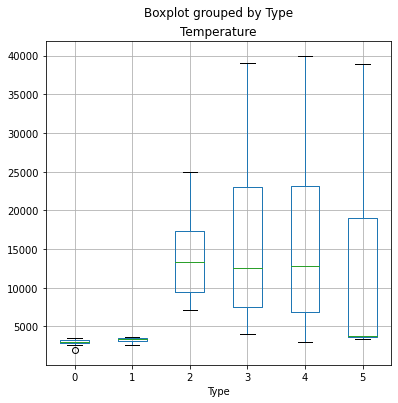

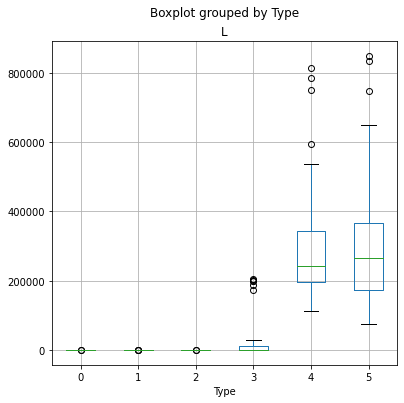

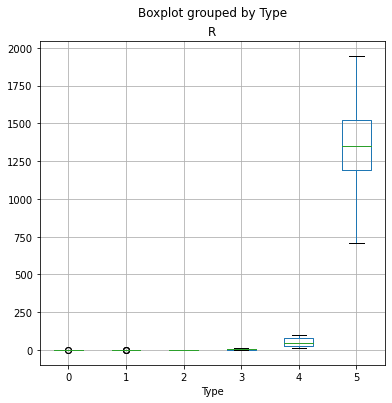

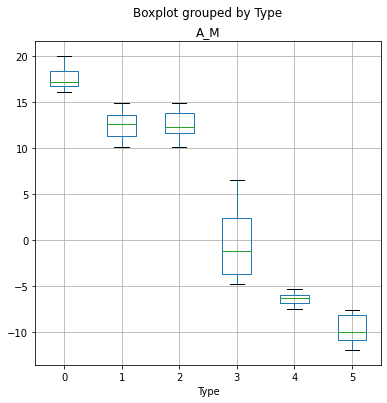

In [12]:
# Comparaison de chaque feature avec le label
%matplotlib inline

features = ['Temperature', 'L', 'R', 'A_M']
for col in features:
    stars_datas.boxplot(column=col, by='Type', figsize=(6,6))
    plt.title(col)
plt.show()

### Observations : 

- Temperature : 3 types (2, 3 et 4) ont une moyenne de température similaire tandis que que les 3 autres sont dispersé.

- L : Il n'y a que les types 4 et 5 qui propose des luminosité relative exploitable.

- R : Le dernier type 5 est le seul ayant un rayon significatif.

- A_M : La répartition des grandeur absolue se caractérise par 2 catégories, les type 0, 1 et 2 avec des valeurs positives et les types 3, 4 et 5 avec des valeurs négatives

# 2 - Préparation des données pour l'entraînement

In [13]:
# Importation du modèle de regression logistique de sklearn
from sklearn.linear_model import LogisticRegression

Séparer les features et les labels dans deux variables X et Y.

In [14]:
Y = stars_datas['Type']
X = stars_datas[['Temperature', 'L', 'R', 'A_M', 'Color', 'Spectral_Class']]

In [15]:
X

,Temperature,L,R,A_M,Color,Spectral_Class
0,3068,0.002400,0.1700,16.12,8,5
1,3042,0.000500,0.1542,16.60,8,5
2,2600,0.000300,0.1020,18.70,8,5
3,2800,0.000200,0.1600,16.65,8,5
4,1939,0.000138,0.1030,20.06,8,5
...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,0,6
236,30839,834042.000000,1194.0000,-10.63,0,6
237,8829,537493.000000,1423.0000,-10.73,9,0
238,9235,404940.000000,1112.0000,-11.23,9,0


# 3- Entraîner une régression logistique

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

Séparer les données en deux sous-ensembles : 
- 80% : Données entrainements
- 20% :Données tests

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20, random_state=42)
print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 192 rows
Test Set: 48 rows


Entrainement du model

In [18]:
# Création d'une instance du modèle
model1 = LogisticRegression()
model1.fit(X_train, Y_train)

/home/yannis/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# 4- Évaluer le modèle

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [20]:
# Faire les prédictions sur l'ensemble de test
predictions1 = model1.predict(X_test)

In [21]:
# On compare les résultats prédit par le modèle avec les vrais labels de l'ensemble de test 
print(classification_report(Y_test,predictions1))

              precision    recall  f1-score   support

           0       0.62      1.00      0.76         8
           1       1.00      0.29      0.44         7
           2       0.67      1.00      0.80         6
           3       1.00      0.50      0.67         8
           4       0.89      1.00      0.94         8
           5       1.00      1.00      1.00        11

    accuracy                           0.81        48
   macro avg       0.86      0.80      0.77        48
weighted avg       0.88      0.81      0.79        48



In [22]:
# La matrice de confusion permet de voir les résultat du modèle et ses erreurs.
confusion_matrix(Y_test,predictions1)

array([[ 8,  0,  0,  0,  0,  0],
       [ 5,  2,  0,  0,  0,  0],
       [ 0,  0,  6,  0,  0,  0],
       [ 0,  0,  3,  4,  1,  0],
       [ 0,  0,  0,  0,  8,  0],
       [ 0,  0,  0,  0,  0, 11]])

### Observations : 
Le modèle semble performant pour les types 0, 2, 4 et 5 en fournissant un bonne précision, recall et f1 score. Mais il a des difficultés à prédire correctement les types 1 et 3. 

# 5- Tester un autre algorithme de classification

###### Test avec un arbre de décision

In [23]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(max_depth=10)
model2.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=10)

In [24]:
predictions2 = model2.predict(X_test)

In [25]:
print(classification_report(Y_test,predictions2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        11

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



In [26]:
confusion_matrix(Y_test,predictions2)

array([[ 8,  0,  0,  0,  0,  0],
       [ 0,  7,  0,  0,  0,  0],
       [ 0,  0,  6,  0,  0,  0],
       [ 0,  0,  0,  8,  0,  0],
       [ 0,  0,  0,  0,  8,  0],
       [ 0,  0,  0,  0,  0, 11]])

### Observations : 

La performance du modèle2 est parfaite avec l'arbe de décisions. Toutes les prédictions sont correctes !

###### Test avec un GradientBoosting

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
model3 = GradientBoostingClassifier()

In [28]:
model3.fit(X_train, Y_train)

GradientBoostingClassifier()

In [29]:
predictions3 = model3.predict(X_test)

In [30]:
print(classification_report(Y_test,predictions3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        11

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



In [31]:
confusion_matrix(Y_test,predictions3)

array([[ 8,  0,  0,  0,  0,  0],
       [ 0,  7,  0,  0,  0,  0],
       [ 0,  0,  6,  0,  0,  0],
       [ 0,  0,  0,  8,  0,  0],
       [ 0,  0,  0,  0,  8,  0],
       [ 0,  0,  0,  0,  0, 11]])

### Observations : 

La performance du modèle3 est parfaite avec le gradientBoosting. Toutes les prédictions sont correctes !